
<img src="https://i.ibb.co/wQg0qzq/Banner.png" width="900" alt="KCode Banner"  />

<a href="https://www.linkedin.com/in/kauebr/"><img src="https://cdn-icons-png.flaticon.com/512/174/174857.png" width="30" ></a> <a href="mailto: kauemandarino@gmail.com"><img src="https://cdn-icons-png.flaticon.com/512/5968/5968534.png" width="30" ></a><a href="
https://api.whatsapp.com/send?phone=5541991835800&text=Oi"> <img src="https://imagepng.org/wp-content/uploads/2017/08/whatsapp-icone-1.png" width="30" ></a><a href="https://github.com/kauebr/"><img src="https://github.githubassets.com/images/modules/logos_page/Octocat.png" width="30" ></a>




# Árvores de decisão



## Objetivos




* Desenvolver um modelo de classificação usando algoritmo de árvore de decisão

# Importando as bibliotecas

In [64]:
import sys
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
import requests as rq

## Baixando os dados


In [65]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv'
my_data = pd.read_csv(url)


<div id="Sobre o dataset">
    <h2>Sobre o conjunto de dados</h2>
    Imagine que você é um pesquisador médico compilando dados para um estudo. Você coletou dados sobre um conjunto de pacientes, todos com a mesma doença. Durante o curso do tratamento, cada paciente respondeu a um dos 5 medicamentos, Medicamento A, Medicamento B, Medicamento C, Medicamento X e Y.
    <br>
    <br>
    Parte do seu trabalho é construir um modelo para descobrir qual medicamento pode ser apropriado para um futuro paciente com a mesma doença. As características deste conjunto de dados são Idade, Sexo, Pressão Arterial e Colesterol dos pacientes, e o alvo é o medicamento ao qual cada paciente respondeu.
    <br>
    <br>
    É uma amostra de classificador multiclasse, e você pode usar a parte de treinamento do conjunto de dados
    para construir uma árvore de decisão e usá-la para prever a classe de um paciente desconhecido ou para prescrever um medicamento para um novo paciente.
</div>

In [66]:
my_data[0:6]

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
5,22,F,NORMAL,HIGH,8.607,drugX


In [67]:
my_data.shape

(200, 6)

<div href="Pré Processamento">
    <h2>Pre-processing</h2>
</div>


Usando <b>my_data</b> como os dados Drug.csv lidos pelo pandas, declaramos as seguintes variáveis: <br>

<ul>
    <li> <b> X </b> como a <b> Matriz de Recursos </b> (dados de my_data) </li>
    <li> <b> e </b> como o<b> Vetor Resposta </b> (target) </li>
</ul>


Removendo a coluna que contém o nome de destino, pois ela não contém valores numéricos.

In [68]:
X = my_data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
my_data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


Alguns recursos neste conjunto de dados são categóricos, como **Sexo** ou **BP**. Infelizmente, as Árvores de Decisão do Sklearn não lidam com variáveis ​​categóricas. Ainda podemos converter esses recursos em valores numéricos usando **pandas.get_dummies()**
para converter a variável categórica em variáveis ​​dummy/indicador.

In [82]:
# Transformando CLASSES em NÚMEROS

from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
X[:,1] = le_sex.transform(X[:,1]) 


le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
X[:,2] = le_BP.transform(X[:,2])


le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
X[:,3] = le_Chol.transform(X[:,3]) 

X[0:5]

ValueError: y contains previously unseen labels: 0

Agora podemos preencher a variável de destino.


In [70]:
y = my_data["Drug"]
y[0:5]

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

<hr>

<div id="Configurando a Árvore de Decisão">
    <h2>Configurando a Árvore de Decisão</h2>
    Usaremos a <b>divisão de treinamento/teste</b> em nossa <b>árvore de decisão</b>. Vamos importar <b>train_test_split</b> de <b>sklearn.cross_validation</b>.
</div>

In [71]:
from sklearn.model_selection import train_test_split

Agora <b> train_test_split </b> retornará 4 parâmetros diferentes. Vamos nomeá-los:<br>
X_trainset, X_testset, y_trainset, y_testset <br> <br>
O <b> train_test_split </b> precisará dos parâmetros: <br>
X, y, test_size=0,3 e random_state=3. <br> <br>
O <b>X</b> e <b>y</b> são as matrizes necessárias antes da divisão, o <b>test_size</b> representa a proporção do conjunto de dados de teste e o <b>random_state< /b> garante que obtenhamos as mesmas divisões.


In [72]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

In [73]:
qa = X_trainset.shape
qb = y_trainset.shape

In [74]:
print(22*'-')
print(f'Dimensions: \n X_trainset: {qa}\n x_trainset {qb}')
print(22*'-')

----------------------
Dimensions: 
 X_trainset: (140, 5)
 x_trainset (140,)
----------------------


<hr>

<div id="Modelando">
     <h2>Modelagem</h2>
     Primeiro, criaremos uma instância do <b>DecisionTreeClassifier</b> chamada <b>drugTree</b>.<br>
     Dentro do classificador, especifique <i>critério="entropy" </i> para que possamos ver o ganho de informação de cada nó.
</div>

In [75]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=4)

Em seguida, ajustaremos os dados com a matriz de recursos de treinamento <b> X_trainset </b> e o vetor de resposta de treinamento <b> y_trainset </b>

In [76]:
drugTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

<hr>

<div id="Predição">
     <h2>Previsão</h2>
     Vamos fazer algumas <b>previsões</b> no conjunto de dados de teste e armazená-las em uma variável chamada <b>predTree</b>.
</div>

In [77]:
predTree = drugTree.predict(X_testset)

Posso imprimir <b>predTree</b> e <b>y_testset</b> se você quiser comparar visualmente as previsões com os valores reais.

In [78]:
print (predTree [0:5])
print (y_testset [0:5])


['drugY' 'drugX' 'drugX' 'drugX' 'drugX']
40     drugY
51     drugX
139    drugX
197    drugX
170    drugX
Name: Drug, dtype: object


<hr>

<div id="avaliação">
     <h2>Avaliação</h2>
     Em seguida, vamos importar <b>métricas</b> do sklearn e verificar a precisão do nosso modelo.
</di

In [79]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.9833333333333333


**Pontuação de classificação de precisão** calcula a precisão do subconjunto: o conjunto de rótulos previsto para uma amostra deve corresponder exatamente ao conjunto de rótulos correspondente em y_true.

Na classificação multirótulo, a função retorna a precisão do subconjunto. Se todo o conjunto de rótulos previstos para uma amostra corresponder estritamente ao conjunto verdadeiro de rótulos, a precisão do subconjunto será 1,0; caso contrário, é 0,0.

<hr>

<div id="visualização">
     <h2>Visualização</h2>

Vamos visualizar a árvore

</div>


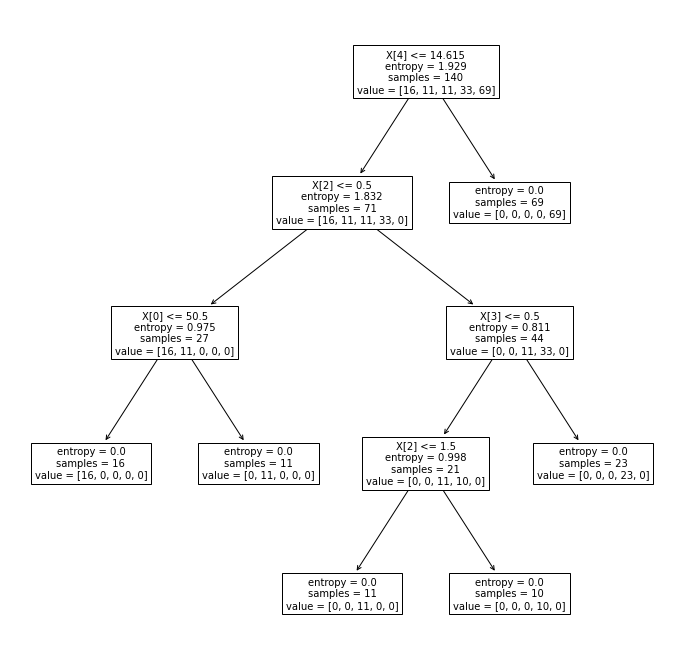

In [80]:
plt.figure(figsize=(12,12))
tree.plot_tree(drugTree, fontsize=10)
plt.show()

In [81]:
# '0Age', '1Sex', '2BP', '3Cholesterol', '4Na_to_K']]
my_data[0:6]

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
5,22,F,NORMAL,HIGH,8.607,drugX
